# ベイズ脳仮説と神経活動による不確実性の表現

が外界の状態を推定する際には**不確実性 (uncertainty)** を考慮する必要がある．例えば外界は3次元なのに対し，網膜像は2次元であり，脳は不良設計問題を解かねばならない．時間の推定においては時間経過を直接的に示す感覚情報はないため，不確実性を常に含む．これらのような不確実性を含んだ推定において脳がベイズ推定を用いているというのが**ベイズ脳仮説 (Bayesian brain hypothesis)** である (Knill & Pouget, 2004)．ここで外界の状態を$x$, それによって生まれた感覚刺激を$y$, 脳内の神経結合を$W$としよう．**事前分布 (prior)** を$p(x|W)$とし，**尤度 (likelihood)** を$p(y|x,\ W)$とすると，**事後分布 (posterior)**は

$$
\begin{equation}
p\left( x \middle| y \right) = \frac{p\left( y \middle| x,\ W \right)p(x|W)}{p(y|W)}
\end{equation}
$$

しかし，ここでの問題は次の2点である．すなわち，

1.  神経回路で確率分布を如何にして表現するか．

2.  規格化定数 $Z = p\left( y \middle| W \right) = \int p\left( y \middle| x,\ W \right)p\left( x \middle| W \right)\ dx$をどう計算するか．


- Neural Sampling Codes
- Probabilistic Population Coding
- Distributed distributional code
RS Zemel, P Dayan, and A Pouget. Probabilistic interpretation of population codes. Neural Computation, 10(2):403–430, 1998. [8] MSahani and P Dayan. Doubly distributional population codes: Simultaneous representation of uncertainty and multiplicity. Neural Computation, 15(10):2255–2279, 2003.

## 神経回路における不確実性の表現

　神経細胞あるいは細胞集団が確率分布を表現するにはどうすればよいだろうか．神経細胞の活動がある変数を表現していると仮定しよう．単一の細胞の瞬時的な活動がある変数の点推定に対応していると考えれば，単一の細胞の多数の活動あるいは多数の細胞の瞬時的な活動により分布は表現できると考えられる (Fig.2)．

**Fig. 2**. 神経活動による確率分布表現の2種類の方法．(Fiser, Berkes, Orbán, & Lengyel, 2010)より引用．(a)多数の細胞の瞬時的な活動により分布を表現する符号化 (e.g. probabilistic population codes; PPCs)．(b)単一の細胞の多数の活動により分布を表現する符号化 (e.g. neural sampling codes; NSCs)．Table1は両者の比較．著者らはSampling-based codeの方が優れていると考えている．

多数の細胞の瞬時的な活動により分布を表現する符号化としては**probabilistic population codes** (Ma, Beck, Latham, & Pouget, 2006)や**distributional TD learning** (Dabney et al., 2020; Lowet, Zheng, Matias, Drugowitsch, & Uchida, 2020)などが該当する．一方で単一の細胞の多数の活動により分布を表現する符号化は**サンプリングに基づいた符号化 (sampling-based coding)** あるいは**神経サンプリング (neural sampling)** と呼ぶ．神経サンプリングの基盤となる現象は**神経活動の変動性 (neural variability)** である．これは感覚を処理する皮質領野（例えば視覚野）において同じ入力であっても神経細胞の活動が時間や試行に応じて変動する現象のことである (Stein, Gossen, & Jones, 2005)．これが単なるノイズなのか機能があるのかに関しては様々な説が提案されているが，神経活動の変動性によりMCMCが行われているという仮説は(Hoyer & Hyvärinen, 2002)において（自分の知る限り）初めて提案された．(Sanborn & Chater, 2016)は”Bayesian Brains without Probabilities”というキャッチーな題だが，MCMCとBayesian Brainの勉強にはなる．

## エネルギーベースモデル

エネルギーベースモデルではネットワークの状態をスカラー値に変換するエネルギー関数 (あるいはコスト関数) を定義し，推論時と学習時の双方においてエネルギーを最小化するようにネットワークの状態を更新する (LeCun, Chopra, Hadsell, Ranzato, & Huang, 2006)．エネルギーベースモデルとしてはIsingモデルや(Amari-)Hopfieldモデル，Boltzmannマシン等が該当する．モデルの神経活動を$\mathbf{x} \in \mathbb{R}^{n}$，パラメータ$\theta$, （ポテンシャル）エネルギー関数 $E_{\theta}:\ \mathbb{R}^{n}\mathbb{\rightarrow R}$とすると，$\mathbf{x}$の分布はGibbs-Boltzmann分布を用いて次のように表せる．

$$
\begin{equation}
p_{\theta}(\mathbf{x})\  = \frac{\exp\left( - {\beta E}_{\theta}\left( \mathbf{x} \right) \right)}{Z_{\theta}}
\end{equation}
$$

ただし，$Z_{\theta}$は規格化定数であり，$Z_{\theta} = \ \int_{}^{}{- \beta E_{\theta}\left( \mathbf{x} \right)d\mathbf{x}}$ である．定義した任意の $E_{\theta}(\mathbf{x})$ を神経活動$\mathbf{x}$やパラメータ$\theta$で微分することで，推論と学習ダイナミクスを定義できる (Fig. 3)．逆に神経活動のダイナミクスを積分することでエネルギーを定義することもできる (Isomura & Friston, 2020)．

Fig. 3. (上) エネルギー，神経活動の確率分布，推論・学習ダイナミクスの関係．簡単のため$\beta = 1$とした．いずれかを定義すれば他が導出できる．確率分布は直接保持されず，神経活動のダイナミクスによるサンプリングで表現される．（下）神経活動のダイナミクスからエネルギーと学習ダイナミクスを導出する例．

## エネルギーベースモデルとサンプリング

ポテンシャルエネルギー関数$E$を下に凸の曲面，高次元の神経活動$\mathbf{x}$をその曲面を転がる球としよう．エネルギーの最小化に勾配降下を用いるエネルギーベースモデルでは球は斜面の勾配に沿って運動し，最小のエネルギー状態に到達する．Hopfieldモデルは単なる勾配降下であり，単純な勾配降下を用いるために極小解に陥りやすい．このために各ニューロンが確率的に0,1の値を取るBoltzmannマシンが考案された(Ackley, Hinton, & Sejnowski, 1985)．(制限)BoltzmannマシンではGibbsサンプリングを用い，各ユニットの活動を決める．制限Boltzmannマシンの問題点としては隠れ層間における結合を認めないため感覚入力の無い自発発火を仮定できない点にある．よりモデル構築の柔軟性が高い発火率モデルあるいはspikingモデルにおけるRNNにおいて効率的にサンプリングを行うには，ノイズや振動を用いる (Fig. 4)．なお，点推定を行うには収束時に一定の発火率を保ち続ける必要があり，難しいと考えられる．

Fig. 4. 勾配法と勾配法にノイズ，振動を加えた場合の神経活動のダイナミクスの違い．（左上）2つの細胞の活動$x_{1},\ x_{2}$に対するポテンシャルエネルギー．（右上段）ポテンシャルエネルギー局面上の神経活動の変化．左から勾配法，Langevinダイナミクス，Hamiltonian (+Langevin)ダイナミクス．（右下段）各ダイナミクスにおける$x_{1},\ x_{2}$の経時的変化．Hamiltonianダイナミクスでは振動（+ノイズ）を用いて効率的にサンプリングしている．

## Langevin動力学と神経回路
Langevinモンテカルロ法 (LMC)はLangevin動力学を用いてMCMCを行う手法である．LMCはパラメータを$\mathbf{x}$とし，$d\eta$を平均0, 分散1のWiener過程とすると，

$$
\begin{equation}
\frac{d\mathbf{x}}{dt} = - \beta\frac{\partial E\left( \mathbf{x} \right)}{\partial\mathbf{x}} + \sqrt{2}\ d\eta
\end{equation}
$$

となる．この過程で得られる確率分布はFokker–Planck方程式に従う．エネルギーベースモデルにおいて$E_{\theta}\left( \mathbf{x} \right) = - \frac{1}{\beta}(\log{\ p_{\theta}\left( \mathbf{x} \right) + Z_{\theta})}$であり，$Z_{\theta}$は定数であるため，

$$
\begin{equation}
\frac{\partial E_{\theta}\left( \mathbf{x} \right)}{\partial\mathbf{x}} = - \frac{1}{\beta}\frac{\partial\log{p_{\theta}\left( \mathbf{x} \right)}}{\partial\mathbf{x}}
\end{equation}
$$

が成り立つ．よって，

$$
\begin{equation}
\frac{d\mathbf{x}}{dt} = \frac{\partial\log{p_{\theta}\left( \mathbf{x} \right)}}{\partial\mathbf{x}} + \sqrt{2}\ d\eta
\end{equation}
$$

と書ける．多変量正規分布からLMCを用いてサンプリングする過程は神経回路モデルに落とし込むことができる．神経活動$\mathbf{x}$の分布を$p_{\theta}\left( \mathbf{x} \right) = \mathcal{N}\left( \mathbf{\mu},\ \mathbf{\Sigma} \right) \propto \exp\left\lbrack - \frac{1}{2}\left( \mathbf{x - \mu} \right)^{\top}\mathbf{\Sigma}^{- 1}\left( \mathbf{x - \mu} \right) \right\rbrack$とすると，

$$
\begin{align}
\frac{d\mathbf{x}}{dt} &= \frac{\partial\log{p_{\theta}\left( \mathbf{x} \right)}}{\partial\mathbf{x}} + \sqrt{2}\ d\eta\\
&= - \mathbf{\Sigma}^{-1}\left( \mathbf{x - \mu} \right) + \sqrt{2}\ d\eta\\
&= - \mathbf{x}+\left( \mathbf{I - \Sigma}^{-1} \right)\mathbf{x} + \ \mathbf{\Sigma}^{-1}\mathbf{\mu} + \sqrt{2}\ d\eta
\end{align}
$$

ここで$\mathbf{W} = \mathbf{I} -\mathbf{\Sigma}^{-1},\quad \mathbf{b} = \mathbf{\Sigma}^{-1}\mathbf{\mu}$とすると，

$$
\begin{equation}
\frac{d\mathbf{x}}{dt} = - \mathbf{x} + \mathbf{Wx} + \mathbf{b} + \sqrt{2}\ d\eta
\end{equation}
$$

となり，この入力のない（自発発火を行う）線形RNNの活動$\mathbf{x}$は$\mathcal{N}(\mathbf{\mu},\ \mathbf{\Sigma})$ からのサンプリングとなる．重要なのは，分散はシナプス結合重み$\mathbf{W}$，平均はシナプス結合重み$\mathbf{W}$とバイアス(閾値)$\mathbf{b}$に影響されるという点である．非線形RNNの場合は，平均と分散の時間発展は導出できても正規分布には当然ならない (Hennequin & Lengyel, 2016)．

## Hamiltonianモンテカルロ法と神経回路
位置ベクトル$\mathbf{u}$の他に運動量ベクトル$\mathbf{v}$を用意し，$\mathbf{u}\mathbf{,\ }\mathbf{v}$をそれぞれ興奮性細胞，抑制性細胞の活動と対応付ける (文字の対称性のため$\mathbf{x}\to \mathbf{u}$とした)．$\mathbf{u,\ v}$は同じ次元のベクトルとする．$\mathbf{u}, \mathbf{v}$の時間発展はハミルトニアン$H$を導入して

$$
\begin{equation}
\tau\frac{d\mathbf{u}}{dt} = \frac{\partial H}{\partial\mathbf{v}},\quad\tau\frac{d\mathbf{v}}{dt} = - \frac{\partial H}{\partial\mathbf{u}}
\end{equation}
$$

と書ける．一般的には$H(\mathbf{u}, \mathbf{v}) = E\left( \mathbf{u} \right) + \frac{1}{2}\mathbf{v}^{\top}\mathbf{v}$であり，$p\left( \mathbf{u},\ \mathbf{v} \right) \propto \exp( - H(\mathbf{u,v}))$である．力学的エネルギーを保つ運動は，対数同時分布における等値線上の運動と同じである．(Aitchison & Lengyel, 2016)では

$$
\begin{equation}
H(\mathbf{u}, \mathbf{v}) = \log p \left(\mathbf{u}, \mathbf{v} \right) + \textrm{Const.} = \log p \left(\mathbf{v} \middle| \mathbf{u} \right) + \log p\left(\mathbf{u} \right) + \textrm{Const.}
\end{equation}
$$

とし，$p\left( \mathbf{v} \middle| \mathbf{u} \right)\mathcal{= N}\left( \mathbf{v};\mathbf{Bu},\ \mathbf{M}^{- 1} \right),\ \ p\left( \mathbf{u} \right) = \mathcal{N\ (}\mathbf{0},\ \mathbf{C}^{- 1})$としている．この場合，

$${\frac{d\mathbf{u}}{dt} = \frac{1}{\tau}\frac{\partial H}{\partial\mathbf{v}} = \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{u},\ \mathbf{v} \right)}}{\partial\mathbf{v}} = \ \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{v}}
}{\frac{d\mathbf{v}}{dt} = - \frac{1}{\tau}\frac{\partial H}{\partial\mathbf{u}} = - \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{u},\ \mathbf{v} \right)}}{\partial\mathbf{u}} = \  - \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{u}} - \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{u} \right)}}{\partial\mathbf{u}}
}$$となる．このままでは等値線上を運動することになるので，Langevinダイナミクスを付け加える．

$${\frac{d\mathbf{u}}{dt} = \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{v}} + \frac{1}{\tau_{L}}\frac{\partial\log{p\left( \mathbf{u},\ \mathbf{v} \right)}}{\partial\mathbf{u}} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta
}{= \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{v}} + \frac{1}{\tau_{L}}\frac{\partial\log{p\left( \mathbf{v|u} \right)}}{\partial\mathbf{u}} + \frac{1}{\tau_{L}}\frac{\partial\log{p\left( \mathbf{u} \right)}}{\partial\mathbf{u}} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta
}{\frac{d\mathbf{v}}{dt} = - \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{u}} - \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{u} \right)}}{\partial\mathbf{u}} + \frac{1}{\tau_{L}}\frac{\partial\log{p\left( \mathbf{u},\mathbf{v} \right)}}{\partial\mathbf{v}} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta
}{= - \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{u}} + \frac{1}{\tau_{L}}\frac{\partial\log{p\left( \mathbf{v|u} \right)}}{\partial\mathbf{v}} - \frac{1}{\tau}\frac{\partial\log{p\left( \mathbf{u} \right)}}{\partial\mathbf{u}} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta}$$

となる．それぞれの項は

$$\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{v}} = \mathbf{B}^{\top}\mathbf{M}\left( \mathbf{Bu} - \mathbf{v} \right)$$

$${\frac{\partial\log{p\left( \mathbf{v} \middle| \mathbf{u} \right)}}{\partial\mathbf{u}} = - \mathbf{M}\left( \mathbf{Bu} - \mathbf{v} \right)
}{\frac{\partial\log{p\left( \mathbf{u} \right)}}{\partial\mathbf{u}} = - \mathbf{Cu}}$$

であるので，

$${\frac{d\mathbf{u}}{dt} = \frac{1}{\tau}\mathbf{B}^{\top}\mathbf{M}\left( \mathbf{Bu} - \mathbf{v} \right) - \frac{1}{\tau_{L}}\mathbf{M}\left( \mathbf{Bu} - \mathbf{v} \right) - \frac{1}{\tau_{L}}\mathbf{Cu} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta
}{\frac{d\mathbf{v}}{dt} = \frac{1}{\tau}\mathbf{M}\left( \mathbf{Bu} - \mathbf{v} \right) + \frac{1}{\tau_{L}}\mathbf{B}^{\top}\mathbf{M}\left( \mathbf{Bu} - \mathbf{v} \right) + \frac{1}{\tau}\mathbf{Cu} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta}$$

となる．$\mathbf{B = I}$ とすると，

$${\frac{d\mathbf{u}}{dt} = \frac{1}{\tau}\mathbf{M}\left( \mathbf{u} - \mathbf{v} \right) - \frac{1}{\tau_{L}}\mathbf{M}\left( \mathbf{u} - \mathbf{v} \right) - \frac{1}{\tau_{L}}\mathbf{Cu} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta
}{= \left\lbrack \left( \frac{1}{\tau} - \frac{1}{\tau_{L}} \right)\mathbf{M} - \frac{1}{\tau_{L}}\mathbf{C} \right\rbrack\mathbf{u} - \left( \frac{1}{\tau} - \frac{1}{\tau_{L}} \right)\mathbf{Mv} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta
}{\frac{d\mathbf{v}}{dt} = \frac{1}{\tau}\mathbf{M}\left( \mathbf{u} - \mathbf{v} \right) + \frac{1}{\tau_{L}}\mathbf{M}\left( \mathbf{u} - \mathbf{v} \right) + \frac{1}{\tau}\mathbf{Cu} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta
}{= \left\lbrack \left( \frac{1}{\tau} + \frac{1}{\tau_{L}} \right)\mathbf{M} + \frac{1}{\tau_{L}}\mathbf{C} \right\rbrack\mathbf{u} - \left( \frac{1}{\tau} + \frac{1}{\tau_{L}} \right)\mathbf{Mv} + \sqrt{\frac{2}{\tau_{L}}}\ d\eta}$$

となり，$\mathbf{u}\mathbf{,\ v}$と定行列およびノイズに依存してサンプリングダイナミクスを記述できる．長々と式変形を書いたが，重要なのは**興奮性・抑制性という2種類の細胞群の相互作用により生み出された振動を用いてサンプリングにおける自己相関を下げることができる**という点である (Fig.5)．

## ベイズ脳仮説
Knill, David C., and Alexandre Pouget. 2004. “The Bayesian Brain: The Role of Uncertainty in Neural Coding and Computation.” Trends in Neurosciences 27 (12): 712–19.

## 神経活動による不確実性の表現
ここまでは最尤推定やMAP推定などにより，パラメータ(神経活動，シナプス結合)の点推定を行ってきた．**不確実性(uncertainty)** を神経回路で表現する方法として主に2つの符号化方法，**サンプリングに基づく符号化(sampling-based coding; SBC or neural sampling model)** および**確率的集団符号化(probabilistic population coding; PPC)** が提案されている．SBCは神経活動が元の確率分布のサンプルを表現しており，時間的に多数の活動を集めることで元の分布の情報が得られるというモデルである．PPCは神経細胞集団により，確率分布を表現するというモデルである．

- (Walker et al., 2022)がまとめ．
- (Fiser et al., 2010)の比較表を入れる．
- 神経活動の変動性 (neural variability)
- 自発活動が事前分布であるという説 {cite:p}`Fiser2010-kw`, {cite:p}`Berkes2011-it`.
- {cite:p}`Hoyer2002-ci`
- {cite:p}`Sanborn2016-en`

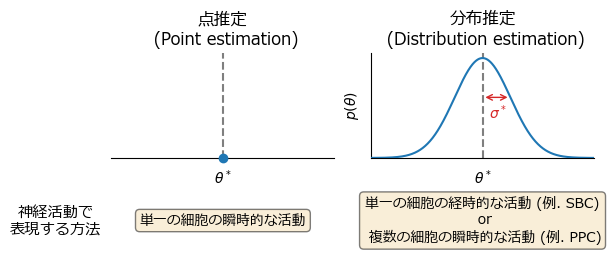

In [1]:
using PyPlot, LinearAlgebra, Random, Distributions
using PyPlot: matplotlib
using KernelDensity
Random.seed!(2)
rc("font", family="Meiryo")

gaussian(x, μ, σ) = 1/(σ*sqrt(2*π))*exp(-0.5*((x-μ)/σ)^2)

x = -4:0.01:4
d = Normal(0, 1); 

props = Dict("boxstyle" => "round", "facecolor" => "wheat", "alpha" => 0.5)
fig, ax = subplots(1,2, figsize=(6,2),sharex="all",sharey="all",constrained_layout=true)
ax[1].set_title("点推定\n (Point estimation)")
ax[2].set_title("分布推定\n (Distribution estimation)")
ax[2].set_ylabel(L"$p(\theta)$")
ax[1].scatter(0, 0,clip_on=false,zorder=5)
ax[2].plot(x, pdf.(d, x), zorder=5)
ax[1].spines.left.set_visible(false)
for i in 1:2
    ax[i].set_xlabel(L"$\theta^*$")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylim(0, )
    ax[i].set_xlim(-4,4)
    ax[i].axvline(0, linestyle="dashed", color="tab:gray")
    ax[i].spines.right.set_visible(false)
    ax[i].spines.top.set_visible(false)
end

ax[2].annotate(text="", xy=(0,pdf(d, 1)), xytext=(1,pdf(d, 1)), arrowprops=Dict("arrowstyle" => "<->", "color" => "tab:red"))
ax[2].text(0.55, pdf(d, 1)-0.06, L"$\sigma^*$",ha="center",va="center",color="tab:red");

ax[1].text(-6, -0.25, "神経活動で\n表現する方法",fontsize=11,ha="center",va="center");
ax[1].text(0, -0.25, "単一の細胞の瞬時的な活動",fontsize=10,ha="center",va="center", bbox=props);
ax[2].text(0, -0.25, "単一の細胞の経時的な活動 (例. SBC)\n or\n 複数の細胞の瞬時的な活動 (例. PPC)",fontsize=10,ha="center",va="center", bbox=props);

In [2]:
Ns = 20 # num. sampling
Np = 10 # num. ppc neurons

μ_dist = -0.5
mixed_gauss = Normal(μ_dist, 0.5) #混合分布
y = pdf.(mixed_gauss, x); # 真の確率密度
samples = rand(mixed_gauss, Ns); # サンプリング
U = kde(samples); # サンプリングのkde

μs = range(-2, 2, length=Np)
tuning_curves = stack([gaussian.(x, μ, 0.5) for μ in μs])';

ppc_fr = exp.(-(μs .- μ_dist).^2/0.5);
act = ppc_fr' * tuning_curves;

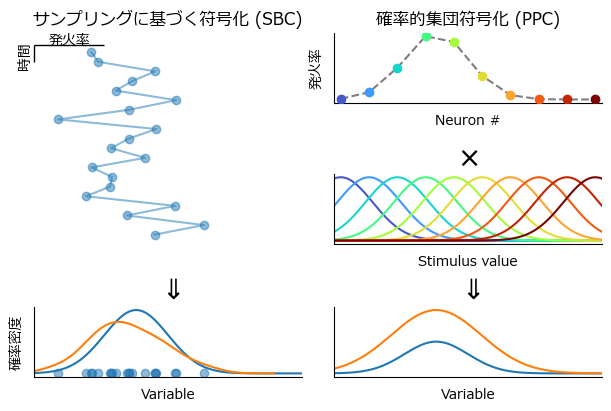

In [3]:
mosaic = """
DA
DB
EC
"""

fig, ax = plt.subplot_mosaic(mosaic,figsize=(6, 4),constrained_layout=true)
cm = get_cmap(:turbo) # get color map
ax["D"].set_title("サンプリングに基づく符号化 (SBC)")
ax["D"].plot(samples, 1:Ns, "o-", alpha=0.5)
ax["D"].set_ylim(-1,)
ax["D"].invert_yaxis()
ax["D"].text(-1.55, -0.3, "発火率", ha="center",va="center"); 
ax["D"].text(-2.25, 1.375, "時間", ha="center",va="center",rotation="vertical")
ax["D"].hlines(y=0.3, xmin=-2.1, xmax=-1.0, clip_on=false, color="k", linewidths=1)
ax["D"].vlines(x=-2.1, ymin=0.3, ymax=2.0, clip_on=false, color="k", linewidths=1)
ax["D"].xaxis.tick_top()
ax["D"].xaxis.set_label_position("top") 
ax["D"].axis("off")

ax["E"].set_title(L"$\Downarrow$", fontsize=20)
ax["E"].plot(x, y)
ax["E"].plot(U.x, U.density)
ax["E"].scatter(samples, zeros(Ns), alpha=0.5, marker="o")
ax["E"].spines.right.set_visible(false)
ax["E"].spines.top.set_visible(false)
ax["E"].set_xlabel("Variable")
ax["E"].set_ylabel("確率密度");

ax["A"].set_title("確率的集団符号化 (PPC)")

for i in 1:Np
    ax["A"].scatter(μs[i], ppc_fr[i],color=cm(i/Np),zorder=5)
end
ax["A"].plot(μs, ppc_fr, "--", color="tab:gray")
ax["A"].set_ylabel("発火率"); 
ax["A"].set_xlabel("Neuron #")
for i in 1:Np
    ax["B"].plot(x, tuning_curves[i, :],color=cm(i/Np))
end

ax["B"].set_title(L"$\times$", fontsize=20)
ax["B"].set_xlabel("Stimulus value")

ax["C"].set_title(L"$\Downarrow$", fontsize=20)
ax["C"].plot(x, y)
ax["C"].plot(x, act)
ax["C"].set_xlabel("Variable")
for i in 'A':'C'
    ax[string(i)].spines.right.set_visible(false)
    ax[string(i)].spines.top.set_visible(false)
end

for i in 'A':'E'
    ax[string(i)].set_xlim(-2.1, 2.1)
    ax[string(i)].set_xticks([])
    ax[string(i)].set_yticks([])
end

#fig.tight_layout()

## 参考文献
```{bibliography}
:filter: docname in docnames
```